# **Final Class — Advanced Topics II - Clustering, Scientific ML (PINNs & Neural ODEs) concepts, and Course Review**


## Learning Outcomes
- Explain the **K‑means** objective $J$ and the basic assign/update steps.
- Use **scikit‑learn** to run K‑means; interpret **inertia**.
- Understand the **big picture** of **Scientific ML** with **PINNs** and **Neural ODEs**.
- Review the **main points** from each lecture of the course.

## 1) K‑means clustering

K-means clustering is the simplest clustering algorithm available. Let's take a look at it's high level functionality. How it works and how can we make use of it.

### Objective function
Choose $K$ clusters. Find **centroids** $\{\mu_1,\dots,\mu_K\}$ and **assignments** $c(i)\in\{1,\dots,K\}$ that minimize

$$
J \;=\; \sum_{i=1}^{n} \left\lVert x_i - \mu_{c(i)} \right\rVert^2.
$$

- Intuition: $J$ sums **squared distances** from each point to its cluster centroid. Minimizing $J$ makes clusters **compact**.


### Pros / Cons
- **Pros:** fast; simple; effective for **spherical, well‑separated** clusters.  
- **Cons:** must choose **$K$**; sensitive to **feature scaling** and **outliers**; struggles with **non‑spherical** shapes or very different densities.

Main metric we usually employ in sklearn
- **Inertia** (`kmeans.inertia_`): value of $J$ (also called *within‑cluster sum of squares*). Lower is better but **always decreases** as $K$ grows.  


### A simple example
Let's generate a simple dataset, `make_blobs` sweep a few $K$, look at **inertia**, then visualize one fit.

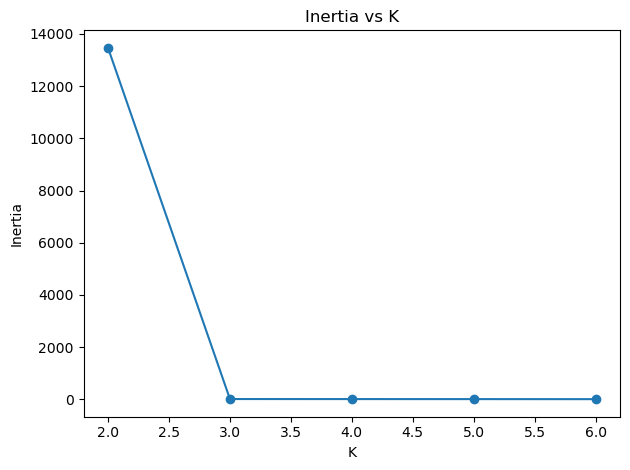

In [9]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, _ = make_blobs(n_samples= 800, centers=3, cluster_std=0.1, random_state=42)


Ks = range(2,7)
inertias = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(list(Ks), inertias, '-o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Inertia vs K")
plt.tight_layout()

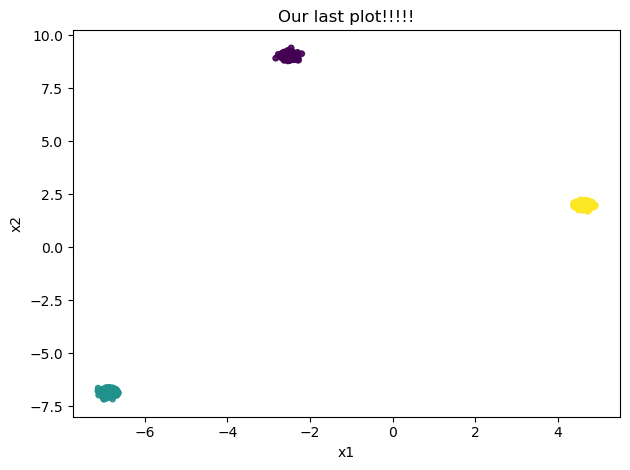

In [10]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels, s=15, alpha=0.9)
plt.title("Our last plot!!!!!")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()

In [8]:
print(kmeans.labels_)

[1 1 2 2 2 1 0 0 2 1 0 2 0 2 0 1 1 0 0 1 2 2 1 1 0 2 0 0 1 0 0 1 0 1 0 2 0
 1 2 2 2 2 0 0 0 0 1 0 1 2 1 0 2 1 1 0 2 2 1 1 1 2 1 2 1 0 0 1 0 2 1 0 2 1
 2 1 0 1 0 0 1 1 0 2 2 2 0 1 0 0 0 1 1 2 1 1 0 1 0 1 2 0 0 1 1 2 2 2 2 1 1
 0 2 0 2 0 0 1 0 2 0 2 2 1 0 0 2 0 1 2 1 1 0 2 2 1 0 1 0 0 2 0 0 1 1 0 2 0
 2 0 2 0 0 1 0 2 1 1 2 0 1 0 2 0 1 0 1 1 1 2 2 1 1 2 0 0 2 2 2 2 0 2 0 0 1
 0 2 2 2 2 0 0 1 1 1 0 0 0 1 2 1 2 0 1 0 2 2 2 2 0 1 2 1 2 2 2 1 0 0 2 0 1
 1 0 2 0 0 1 0 1 0 1 0 2 0 1 2 2 0 1 1 2 2 2 2 1 1 2 0 2 0 0 2 2 1 2 2 1 1
 0 2 0 1 0 2 1 0 2 2 1 0 2 2 2 0 0 0 0 0 0 2 1 0 0 0 2 1 0 2 0 2 2 1 0 0 0
 2 2 2 2 2 0 0 1 1 0 2 1 1 0 2 2 0 0 2 0 2 2 2 0 2 1 2 0 0 1 2 0 1 1 0 0 2
 2 2 1 0 1 1 1 0 0 2 1 2 0 0 2 1 2 1 0 1 1 1 0 2 0 1 2 1 0 1 0 0 1 1 0 2 2
 2 0 1 0 1 0 1 0 1 0 1 0 2 2 0 1 0 2 1 0 0 1 2 0 1 2 2 0 1 0 2 1 1 0 0 0 1
 1 0 2 0 1 1 2 2 1 2 0 2 2 1 1 2 2 2 2 0 2 2 2 0 1 2 2 2 1 0 1 0 0 0 1 1 0
 0 1 1 0 0 1 1 0 2 1 1 0 0 2 1 0 2 2 1 0 2 2 0 0 0 2 2 0 0 0 2 1 0 2 1 1 0
 1 2 0 0 0 1 0 1 1 1 0 1 

## 2) Scientific Machine Learning (SciML) — PINNs & Neural ODEs (simplified)

### 2.1 Big idea
Blend **first‑principles** (balances, kinetics, transport) with **learning** for models that are **data‑efficient** and **physics‑consistent**.

### 2.2 PINNs (Physics Informed Neural Networks)
Train a neural network $x_\theta$ to fit data **and** approximately satisfy **some physics** you specify (ODE/DAE/PDE). One simple training objective:

$$
\min_{\theta}\;
\lambda_{\text{data}}\sum_{i}\big\|x_\theta(z_i)-x_i\big\|^2
\;+\;
\lambda_{\text{phys}}\sum_{j}\big\|\mathcal{F}[u_\theta]\big\|^2,
$$

where $\mathcal{F}[\cdot]$ is **any physics residual** you choose.

### 2.3 Neural ODEs (continuous‑depth networks)
Parameterize a vector field and integrate it:

$$
\frac{dx(t)}{dt} = f_{NN}\!\big(x(t),t\big),\qquad x(t_0)=x_0.
$$

Think of residual networks with step size $\Delta t \to 0$; training uses **differentiable ODE solvers / adjoint ideas**.

Please take a look at the slides I presented to you. They are available on Canvas.

## 3) Course Review — main points by lecture

These bullets follow the structure on the course website. Let's go over them one-by-one.

**Lecture 1 — Python for Numerical Methods (essentials).**  
- Motivation for Python; NumPy arrays and vectorization; control flow; plotting.  
- ChemE‑flavored examples (mass balances, EOS, batch reactor), building coding habits.

**Lecture 2 — Nonlinear systems: root finding.**  
- Bracketing (bisection) vs open (Newton/secant) methods; stopping criteria and convergence.  
- Extending to systems with Jacobians; practical pitfalls and scaling.

**Lecture 3 — Optimization (unconstrained & constrained).**  
- Objective + constraints; first/second‑order optimality ideas.  
- Curve‑fitting (SSE) and `scipy.optimize.minimize` with bounds/constraints.

**Lecture 4 — ODEs (I).**  
- IVPs; explicit/implicit integrators; stability vs accuracy; `scipy.integrate.solve_ivp`.  
- Events/forcing and step‑size effects.

**Lecture 4/5 — ODEs (II).**  
- Larger ODE systems; modeling patterns; diagnostics and engineering context; nullclines; stability.

**Lecture 6 — ML I (intro & workflow).**  
- Train/validation/test; feature considerations; linear regression; decision trees; "pipeline" mindset.

**Lecture 7 — ML II (regression: neural networks).**  
- MLP architecture; activations; optimization; regularization; over/under‑fitting.

**Lecture 8 — ML II (regression: Gaussian processes).**  
- Kernels (RBF/Matérn/periodic); posterior mean + uncertainty; marginal likelihood; small‑data strengths.

**Lecture 9 — ML III (classification).**  
- Decision boundaries; calibration; imbalanced data caveats; metrics beyond accuracy.

**Lecture 10 — Advanced topics / review.**  
- Model selection; validation tools in SKlearn.



## A final note from me...
It’s been a pleasure teaching this class. I’m proud of your progress and curiosity, and I wish each of you the very best as you carry these tools into your careers. Keep building, keep questioning, and keep learning!

## Questions about the project?
